# Distributions - Continuous

There are many types of data distributions. Many of them look similar and are hard to differentiate if one has no intuitive basis for differentiating between them, which can be very frustrating. 
One has to understand statistical properties like moments, characteristic functions, and cumulative distributions to differentiate them.


#### Fitting the Distribution

If you want to fit a distribution to the data, start by answering the following four questions about the data: 

* Does the data take on only discrete values or is the data continuous?
* Look at the symmetry of the data -- and if there is asymmetry, in which direction does it lie? In other words, are positive and negative outliers equally likely or is one more likely than the other?
* What are the upper or lower limits on the data? For example, salary cannot be lower than zero -- whereas other data, like grades earned by students, cannot exceed a certain value (100%).
* What is the likelihood of observing extreme values in the distribution? In some data, extreme values occur rarely; but in others, they occur very often.

## Are the data discrete or continous?

Consider, for example, financial data sets about companies.
Market size, market share, and profit margins, for instance, are all continuous variables. 
However, there are some variables that can take on only discrete forms -- for example, regulatory actions. 
The regulatory authority may dispense one of two or more decisions which are specified up front.
Another example could be the **year** value in a dataset, where the year is encoded in full years (e.g., 2018, _not_ 2018.5).
Each year is a discrete value.

### Probability Density Functions

Continuous random variables have supports that look like

$$S_x = [a, b] \quad or \quad (a, b)$$

...or unions of intervals of the above form. 
Examples of random variables that are often taken to be continuous are:
* the height or weight of an individual,
* other physical measurements such as the length or size of an object, and
* durations of time (usually).

Every continuous random variable X has a probability density function (PDF) denoted $f_x$ associated with it.

For example, A = [c, d], in which case

$$P(X \in A) = \int_c^d f_x(x) dx$$

It follows that the probability that X falls in a given interval is simply the area under the curve of $f_x(X)$ over the interval. 

### How symmetric is the data?

There are some datasets that exhibit symmetry, i.e., the upside is mirrored by the downside. The most common symmetric distribution is the normal distribution, which is shown below for a range of parameters.

[1] -10.0  -9.6  -9.2  -8.8  -8.4  -8.0

[1] 7.694599e-23 3.878112e-21 1.665588e-19 6.095758e-18 1.901082e-16
[6] 5.052271e-15

[1] 7.433598e-07 1.980650e-06 5.070426e-06 1.247124e-05 2.947153e-05
[6] 6.691511e-05

[1] 0.01079819 0.01263131 0.01468136 0.01695527 0.01945645 0.02218417

,x,y,class
,<dbl>,<dbl>,<chr>
1,-10.0,7.694599e-23,y1
2,-9.6,3.878112e-21,y1
3,-9.2,1.665588e-19,y1
4,-8.8,6.095758e-18,y1
5,-8.4,1.901082e-16,y1
6,-8.0,5.052271e-15,y1


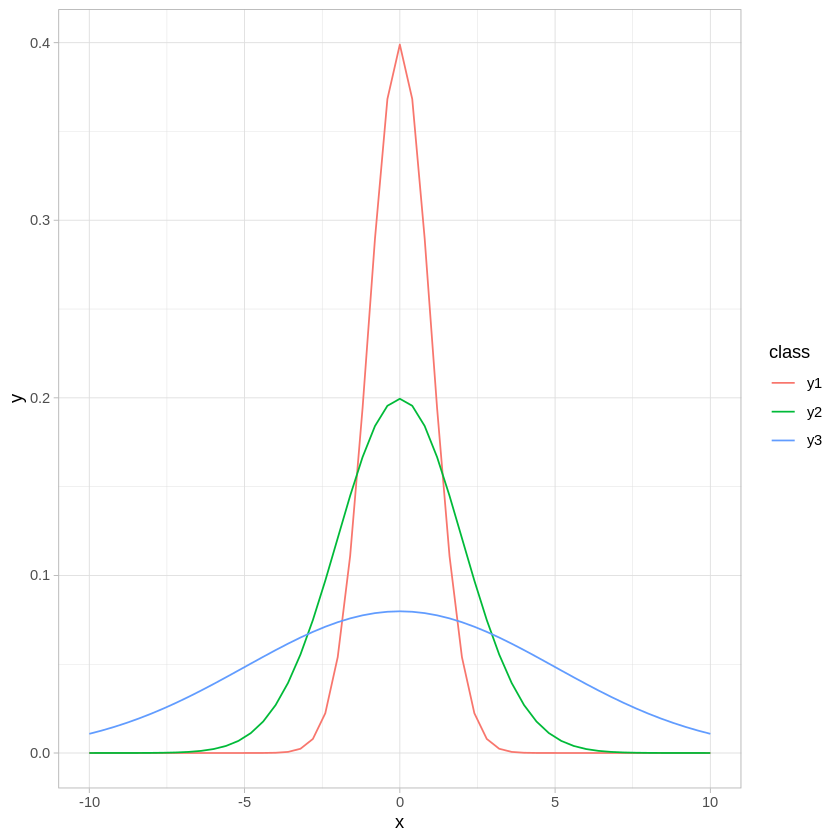

In [1]:
x <- seq(-10, 10, by=0.4)
y1 <- dnorm(x, mean = 0, sd = 1)
y2 <- dnorm(x, mean = 0, sd = 2)
y3 <- dnorm(x, mean = 0, sd = 5)

head(x)
head(y1)
head(y2)
head(y3)

df <- data.frame(x=rep(x,3), y=c(y1, y2, y3), class=c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))
head(df)

library(ggplot2)
ggplot(df, aes(x=x, y=y, color=class)) + geom_line() + theme_light()

----

## Normal distribution:

The normal distribution has several features that make it popular. 
First, it can be fully characterized by just two parameters – the mean and the standard deviation – which makes things easier. 
Second, the probability of any value occurring can be obtained simply by knowing how many standard deviations separate the value from the mean; 
the probability that a value will fall within 2 standard deviations from the mean is roughly 95%.   

The normal distribution is best suited for data that, at the minimum, meets the following conditions:
1. There is a strong tendency for the data to take on a central value.
2. Positive and negative deviations from this central value are equally likely (there is no skew in any one direction).
3. The frequency of the deviations falls off rapidly as we move further away from the central value (extreme values are less likely to occur).

The last two conditions show up when we compute the parameters of the normal distribution; the symmetry of deviations leads to zero skewness and the low probabilities of large deviations from the central value reveal themselves in no kurtosis.

**Misinterpreting data as Normally Distributed**: 
Sometimes we tend to use a normal distribution to characterize data that is non-normal. 
The probability estimates that we obtain will be misleading. 
One obvious problem is when the data is asymmetric but another potential problem is when the probabilities of large deviations from the central value do not drop off as precipitously as required by the normal distribution. 
This means actual distribution of the data has fatter tails than the normal.

A normal distribution can have data spread in different ways, 
such as skewed towards a side (either left or right) 
but in many cases tends to be around a central value with no bias. 
Many scenarios in everyday life follow a Normal Distribution like heights of people, 
errors in measurements, grades on a test, etc. 
We can say that the data is normally distributed if the following conditions are met. 

A normally distributed data satisfies following:
* mean = median = mode
* symmetry about the center
* 50% of values are below mean and 50% are above mean

There are many things you can do if you know that the distribution is normal. 
For example if you know standard deviation of a normal distribution, you can say that any value is:

* likely to be within 1 standard deviation (68 out of 100 should be)
* very likely to be within 2 standard deviations (95 out of 100 should be)
* almost certainly within 3 standard deviations (997 out of 1000 should be)


**Example:** 
95% of students at a certain school are between 1.1m and 1.7m tall. 
With how much confidence can you tell that one of your friends, who is 1.85 meters tall, is taller than the students at the school? 

<img src='../images/normal-distribution.gif'/>
    
_Solution: _
    
The mean is in the middle (1.1 + 1.7)/2 = 1.4 

The standard deviation is half of 95% on either side of the mean (a total of 4 standard deviations) so: (1.7-1.1)/4 = 0.15

So where does your friend's height sit in the distribution? We have to calculate z-score to find that.

 * z = (Friend's height - mean height)/standard deviation
 
 * z-score : 1.85-1.4/0.15 = 3

 * If heights are normally distrubuted, the approximately 99.7% will be within three standard deviations of the means (i.e., have a z-score between -3 and +3).  Of the .3% outside of this interval, half (.15%) will have a z-score less than -3 and half (.15%) will have a z-score more than +3.  If your friend's height z-scores is +3, then only .15% of students will be taller.

### Logistic Distribution:

Logistic distributions are when the data is symmetric but with extreme values that occur more frequently than expected with a normal distribution.

A Logistic Distribution can be written as $X ~ logis(location = \mu; scale = \sigma)$. 
The associated R function is `dlogis(x,location = 0, scale = 1)`. 
The logistic distribution comes up in differential equations as a model for population growth under certain assumptions. 

The mean is $\mu$ and the variance is $\frac{{\pi}^2 scale^2}{3}$.

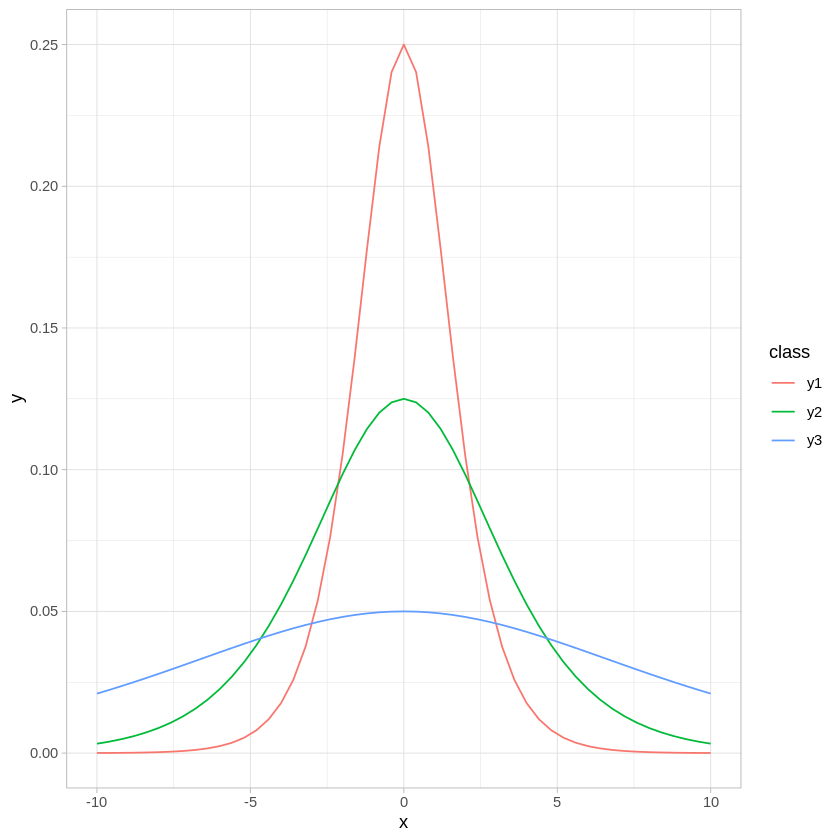

In [2]:
x <- seq(-10,10,by=0.4)
y1=dlogis(x, location = 0, scale = 1)
y2=dlogis(x, location = 0, scale = 2)
y3=dlogis(x, location = 0, scale = 5)

df <- data.frame(x=rep(x,3), y=c(y1, y2, y3), class=c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))
# head(df)

ggplot(df, aes(x=x, y=y, color=class)) + geom_line() + theme_light()

Compare the tails of above distributions with same parameters to those of normal distributions. Logistic distributions have fatter tails. 

### Log Normal Distribution:

Many times data do not exhibit symmetry and instead skew towards either very large positive or very large negative values. 
If the data is positively skewed, a common choice is the _log normal_ distribution, 
which is typically characterized by three parameters: 
a shape (s or sigma), 
a scale (m or median) and a shift parameter ($\theta$).
When m=0 and $\theta$=1, you have the standard log normal distribution and when $\theta$=0, 
the distribution requires only scale and sigma parameters. 
As the sigma rises, the peak of the distribution shifts to the left and the skewness in the distribution increases. 

This is a distribution derived from the normal distribution. If we write U ~ $norm(mean =\mu, sd = \sigma), then \quad X = e^u$ has PDF(probability density function). We can write 

$$X \sim lnorm(meanlog = \mu, sdlog = \sigma)$$

The associated R function is `dlnorm(x, meanlog = 0, sdlog = 1)`.

In [3]:
help(dlnorm)

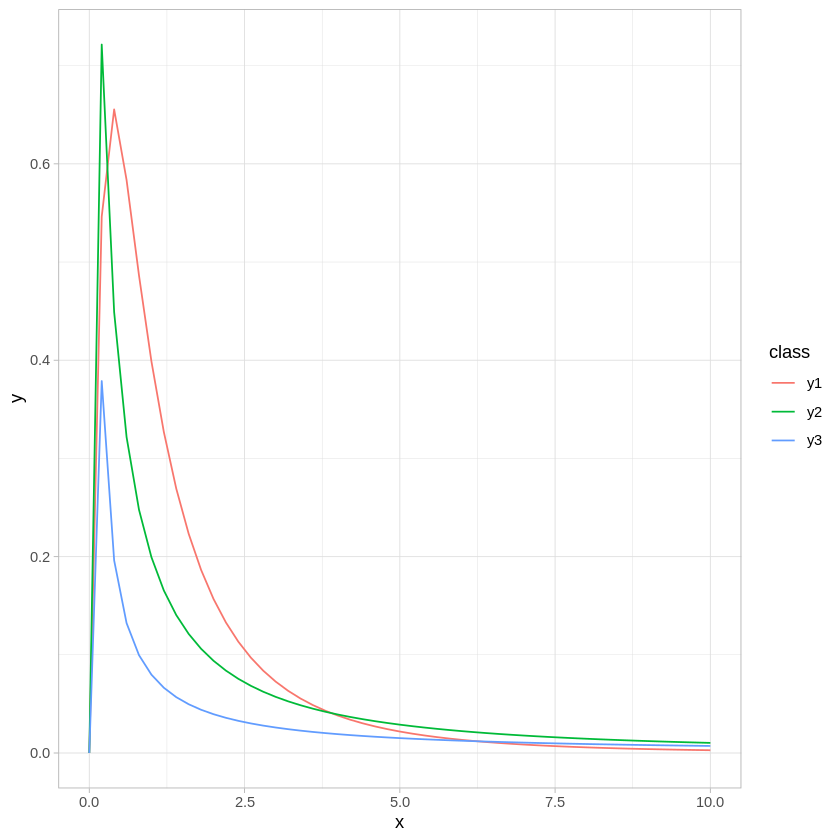

In [4]:
x <- seq(0,10,by=0.2)
y1=dlnorm(x, meanlog = 0, sdlog = 1)
y2=dlnorm(x, meanlog = 0, sdlog = 2)
y3=dlnorm(x, meanlog = 0, sdlog = 5)

df <- data.frame(x=rep(x,3), y=c(y1, y2, y3), class=c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))
# head(df)

ggplot(df, aes(x=x, y=y, color=class)) + geom_line() + theme_light()

### Waiting Time Distributions

In some experiments, the random variable being measured is the time until a certain event occurs. 
For example, a quality control specialist may be testing a manufactured product to see how long it takes until it fails. 
An efficiency expert may be recording the customer traffic at a retail store to streamline scheduling of staff.

#### Exponential Distribution

We say that X has an exponential distribution and write X ~ exp(rate = $\lambda$).

$$f_x(x) = \lambda e^{-\lambda x},\quad x > 0$$

The associated R functions are `dexp(x, rate = 1)`, `pexp`, `qexp`, and `rexp`, 
which give the PDF (probability density function), CDF (cumulative distribution function), quantile function, and simulate random variates, respectively. 
The parameter $\lambda$ measures the rate of arrivals and must be positive. 
The mean is $\mu = 1/{\lambda}$ and the variance is $\sigma^2 = 1/{\lambda^2}$.

In [5]:
help(dexp)

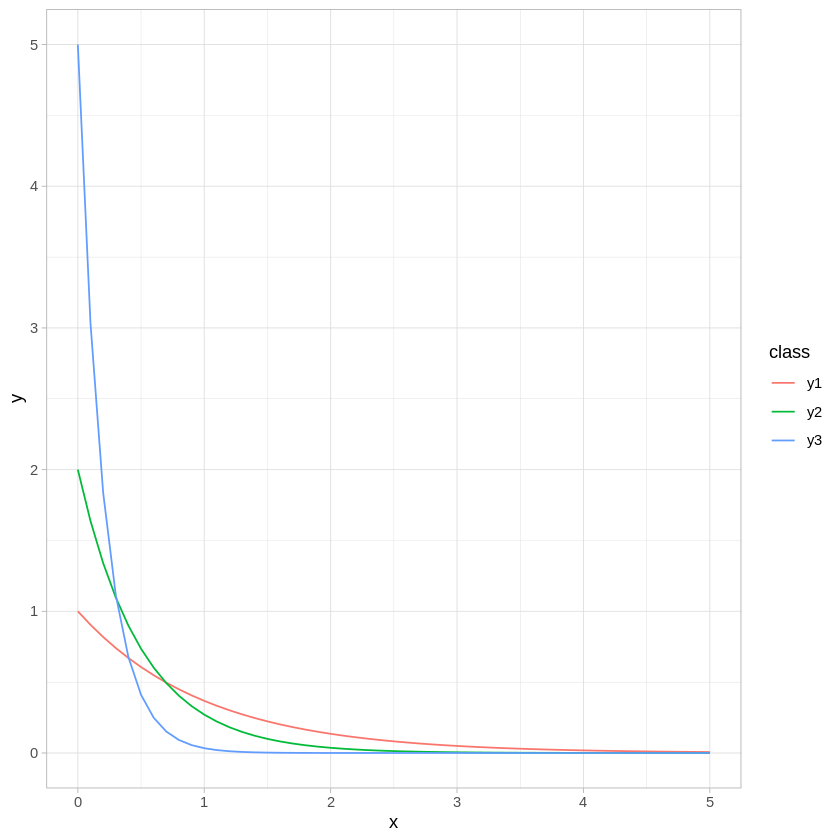

In [6]:
x <- seq(0,5,by=0.1)
y1=dexp(x, rate = 1)
y2=dexp(x, rate = 2)
y3=dexp(x, rate = 5)

df <- data.frame(x=rep(x,3), y=c(y1, y2, y3), class=c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))
# head(df)

ggplot(df, aes(x=x, y=y, color=class)) + geom_line() + theme_light()

#### Gamma Distribution

This is a generalization of the exponential distribution. 
We say that X has a gamma distribution and write X ~ gamma(shape = $\alpha$; rate = $\lambda$). 

The associated R functions are `dgamma(x, shape, rate = 1)`, `pgamma`, `qgamma`, and `rgamma`, 
which give the PDF, CDF, quantile function, and simulate random variates, respectively. 
If $\alpha$ = 1 then X ~ exp(rate = $\lambda$). 
The mean is $\mu = \alpha / \lambda$ and the variance is $\sigma^2 = \alpha / \lambda^2$.

Gamma distribution: 
if X measures the length of time until the first event occurs in a Poisson process with rate $\lambda$ then X ~ exp(rate = $\lambda$). 
If we let Y measure the length of time until the $\alpha^{th}$ event occurs then 

$$Y \sim gamma(shape = \alpha, rate = \lambda)$$

**Example** At a car wash, two customers arrive per hour on the average. We decide to measure how long it takes until the third customer arrives.

_Solution: _ If Y denotes this random time Y ~ gamma(shape = 3; rate = 1= 2).

In [7]:
help(dgamma)

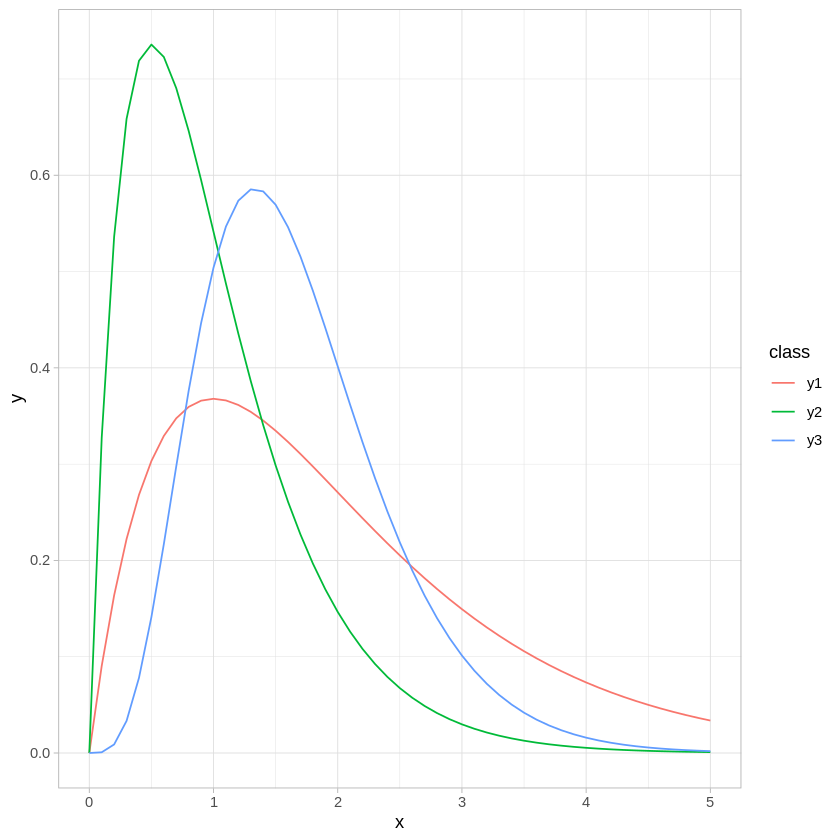

In [8]:
x <- seq(0,5,by=0.1)

y1=dgamma(x, shape=2, rate = 1)
y2=dgamma(x, shape=2, rate = 2)
y3=dgamma(x, shape=5, rate = 3)

df <- data.frame(x=rep(x,3), y=c(y1, y2, y3), class=c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))
# head(df)

ggplot(df, aes(x=x, y=y, color=class)) + geom_line() + theme_light()

## Are there upper or lower limits on data values?
            
There are often natural limits on the values that data can take on.
For example, the revenues and the market value of a firm cannot be negative and the profit margin cannot exceed 100%. 
Using a distribution that does not constrain the values to these limits can create problems. 
For instance, 
using a normal distribution to describe profit margins can sometimes result in profit margins that exceed 100%, 
since the distribution has no limits on either the downside or the upside.

When data is constrained, 
the questions that needs to be answered are whether the constraints apply on one side of the distribution or both, 
and if so, what the limits on values are. 
Once these questions have been answered, there are two choices. 
One is to find a continuous distribution that conforms to these constraints. 
For instance, the log normal distribution can be used to model data, such as revenues and stock prices that are constrained to be never less than zero. 
For data that have both upper and lower limits, you could use the uniform distribution, if the probabilities of the outcomes are even across outcomes or a triangular distribution (if the data is clustered around a central value) as shown below.

<img src="../images/traingular_distribution.png">  

## How likely are you to see extreme values of data, relative to the middle values?

A key consideration in what distribution to use to describe the data is the likelihood of extreme values for the data, relative to the middle value. 
In the case of the normal distribution, this likelihood is small and it increases as you move to the logistic distributions. 
While it may often be more realistic to use the latter to describe real world data, 
the benefits of a better distribution fit have to be weighed against the ease with which parameters can be estimated from the normal distribution. 
Consequently, it may make sense to stay with the normal distribution for symmetric data, unless the likelihood of extreme values increases above a threshold.

The same considerations apply for skewed distributions, 
though the concern will generally be more acute for the skewed side of the distribution. 
In other words, with positively skewed distributions, the question of which distribution to use will depend upon how much more likely large positive values are than large negative values, 
with the fit ranging from the log normal to the exponential.

In summary, the question of which distribution best fits data cannot be answered without looking at whether the data is discrete or continuous, symmetric or asymmetric, and where the outliers lie. 
The figure below summarizes the choices in a chart.


<img src="../images/distributional_choices.png">

----
_There are three types of measures to understand a distribution: _
    * Measures of central tendency
    * Measures of dispersion
    * Measures to describe shape of curve

#### Measures of Central tendency:

Mean, median, and mode are measures of central tendency. 
They help you describe a population through a single metric. 
For example, if you want to compare the average salary of a professor with other professions you will compare their mean salaries.

<img src='../images/central_tendency.gif'/>

Of all the three measures, mean is the one which is most affected by outliers, followed by the median and mode.

img source: https://www.analyticsvidhya.com/blog/2014/07/statistics/

#### Measures of Dispersion:

Range, quartiles, interquartile range, variance, and standard deviation are measures of dispersion. 
They tell us how the population is distributed around the measures of central tendency. 
The image below shows two distributions with different standard deviations but the same mean, median, and mode.

<img src='../images/standard_deviation.png'/>

img source: wiki

#### Measures to describe shape of distribution:

**Skewness** – Skewness is used to measure the asymmetries of a distribution. 
Negatively skewed distribution has a long left tail and vice versa.

**Kurtosis** – Kurtosis is used to measure the height of the “peak” of the curve. 
Distributions with higher peaks have positive kurtosis and vice-versa

<img src='../images/skewness-and-kurtosis.gif'/>
img source: https://www.analyticsvidhya.com/blog/2014/07/statistics/

#### Let's look at some measures from the Body Dimensions dataset.

In [9]:
download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "bdims.RData")
load("bdims.RData")
head(bdims)

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,⋯,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
6,43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


When describing the data, <b>we can plot a normal distribution curve on top of a histogram to see how closely the data follow a normal distribution. </b>
We will work with women’s heights to illustrate this. 
Let's calculate some basic statistics and store them for later use...

In [10]:
male <- subset(bdims, sex == 1)
female <- subset(bdims, sex == 0)

female_hgt_mean <- mean(female$hgt)
female_hgt_sd   <- sd(female$hgt)

In [11]:
summary(female$hgt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  147.2   160.0   164.5   164.9   169.5   182.9 

We will use a density histogram as the backdrop and use the lines function to overlay a normal probability curve. 
The difference between a frequency histogram and a density histogram is that while in a frequency histogram the heights of the bars add up to the total number of observations,
in a density histogram the areas of the bars add up to 1. 

<b>Using a density histogram allows us to properly overlay a normal distribution curve over the histogram since the curve is a normal probability density function. 
Frequency and density histograms both display the same exact shape; they only differ in their y-axis.</b>

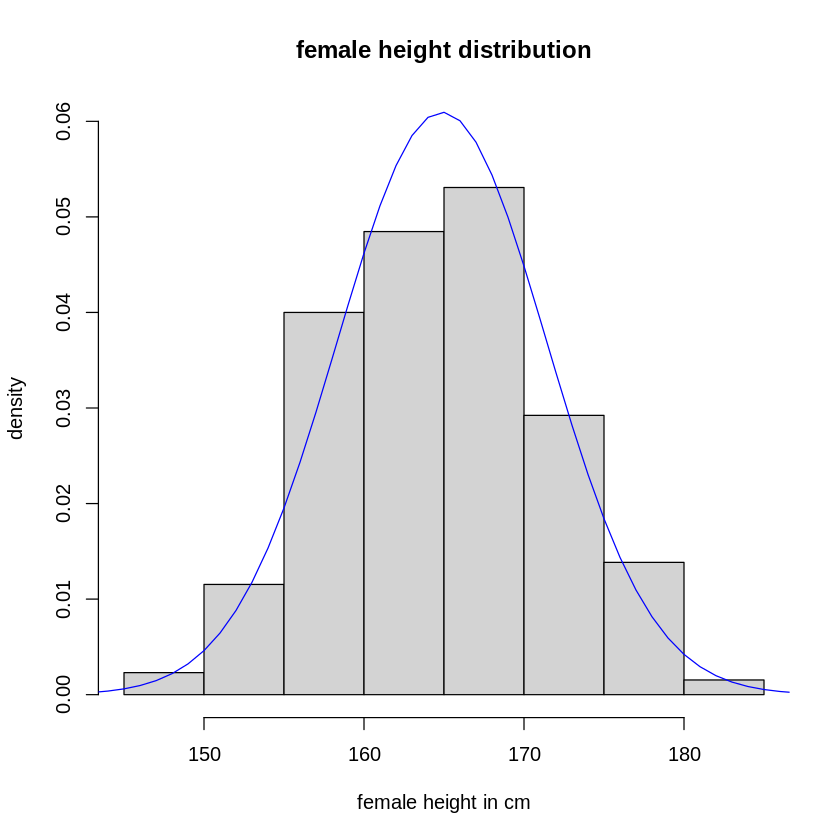

In [12]:
# plain R
hist(female$hgt, probability=TRUE,main="female height distribution",xlab="female height in cm",ylab="density",ylim=c(0, 0.06))
x <- 140:190
y <- dnorm(x = x, mean = female_hgt_mean, sd = female_hgt_sd)
lines(x = x, y = y, col = "blue")

The first command will plot the density histogram. 
We then create the x- and y-coordinates for the normal curve. 
**x range** is chosen as 140 to 190 to cover the minimum height (147.2) and maximum height (182.9). 
To create **y**, we use `dnorm` to calculate the density of each of those x-values in a distribution that is normal with mean `female_hgt_mean` and standard deviation `female_hgt_sd`. 
The last command draws a density curve on existing histogram by connecting **x** with corresponding values of **y**.

Setting ylim = c(0, 0.06) will make sure curve is not cut off because the limits of the x and y axes are set to best fit the histogram.

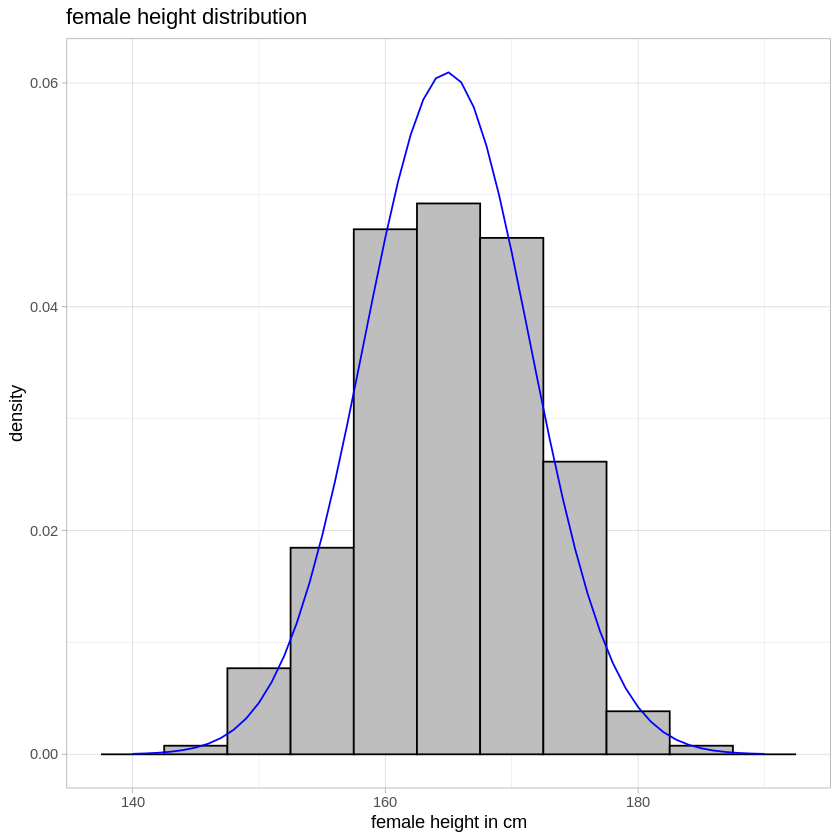

In [13]:
#ggplot
df <- data.frame(h=female$hgt)
df2 <- data.frame(x=x,y=y)

p <- ggplot(df,aes(x=h)) + geom_histogram(aes(y=..density..), binwidth=5, color="black", fill="gray") 
p <- p + geom_line(data=df2, aes(x=x,y=y), color="blue")
p <- p + theme_light() + labs(x="female height in cm",y="density",title="female height distribution")
p

## Evaluating the normal distribution

How can we tell if the data appear to be nearly normally distributed?

We can inspect the above histogram and judge it. 
But we cannot decide just how close the histogram is to the curve. 
One approach to measure the distribution of data is to construct a normal probability plot, 
also called a normal Q-Q plot for “quantile-quantile”.

For example look at the following 

A histogram and normal probability plot of a sample of 100 male heights


<img src="../images/theoritical_quantities.png"/>

* Data are plotted on the y-axis of a normal probability plot, and theoretical quantiles (following a normal distribution) on the xaxis.
<br>
* If there is a linear relationship in the plot, then the data follow a nearly normal distribution.
<br>
* Constructing a normal probability plot requires calculating percentiles and corresponding z-scores for each observation, which is tedious. Therefore we generally rely on software when making these plots.

<h3 style="color:#5CB0DE">Normal probability plot and skewness</h3>

<table>
<tr>
<td> <img src="../images/1.png" align="left"/> 
<td style="text-align: center; vertical-align: middle;"> Right skew - Points bend up and to the left of the line </td>
</tr>

<tr>
<td> <img src="../images/2.png" align="left"/> 
<td style="text-align: center; vertical-align: middle;"> Left skew - Points bend down and to the right of the line </td>
</tr>

<tr>
<td> <img src="../images/3.png" align="left"/> 
<td style="text-align: center; vertical-align: middle;"> Short tails (narrower than the normal distribution) - Points follow an S shaped-curve </td>
</tr>

<tr>
<td> <img src="../images/4.png" align="left"/> 
<td style="text-align: center; vertical-align: middle;"> Long tails (wider than the normal distribution) - Points start below the line, bend to follow it, and end above it </td>
</tr>
<table>

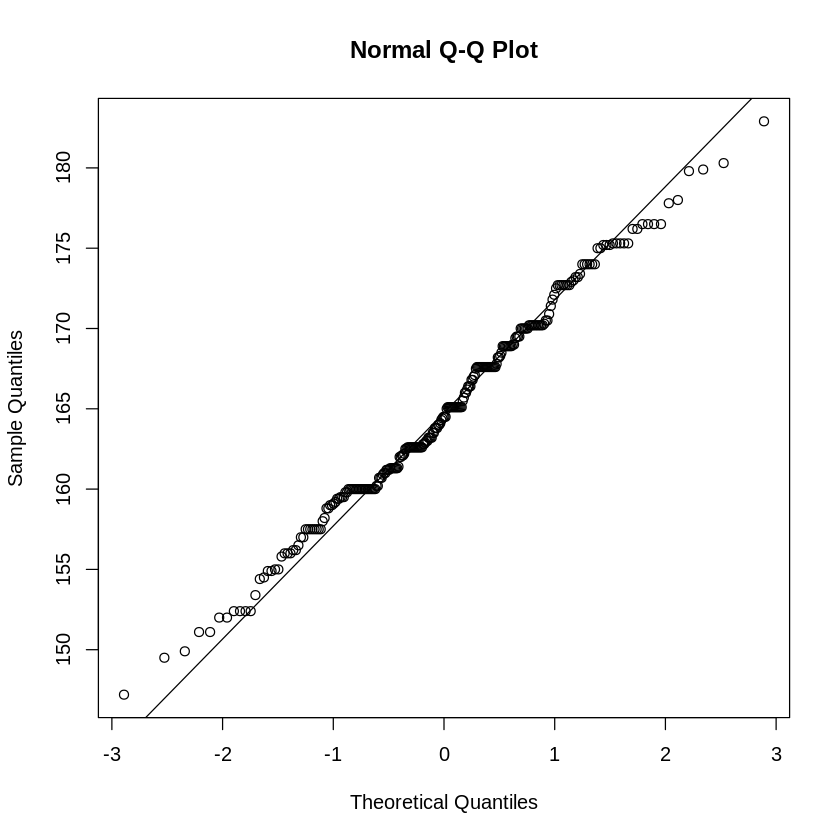

In [14]:
qqnorm(female$hgt)
qqline(female$hgt)

A data set that is nearly normal will result in a probability plot where the points closely follow the line. 
Any deviations from normality leads to deviations of these points from the line. 
The plot for female heights shows points that tend to follow the line but with some errant points towards the tails. 
We’re left with the same problem that we encountered with the histogram above: how close is close enough?

A useful way to address this question is to rephrase it as: 
What do probability plots look like for data that I know came from a normal distribution? 
We can answer this by essentially simulating data from a normal distribution using `rnorm` with similar mean and standard deviation as our original female heights data.

In [15]:
sim_norm <- rnorm(n = length(female$hgt), mean = female_hgt_mean, sd = female_hgt_sd)

Let's make a normal probability plot of sim_norm and see how the points fall on the line.

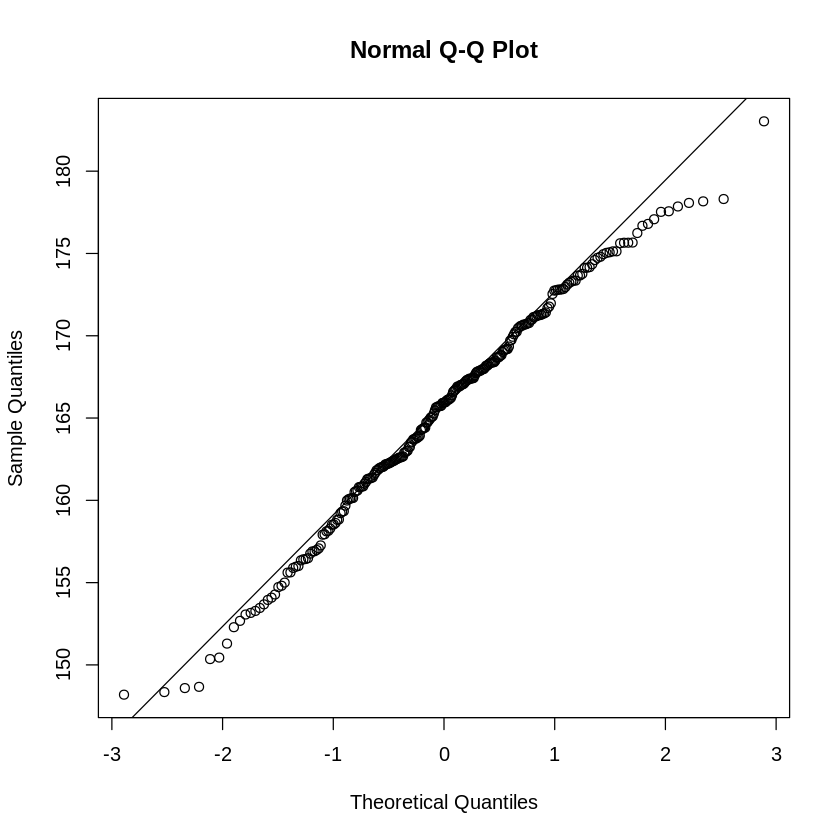

In [16]:
qqnorm(sim_norm)
qqline(sim_norm)

How does the above plot compare to the probability plot for the real data?

If you are still unsure of the answer there is an even better way of comparing the original plot to many more plots using the following function:

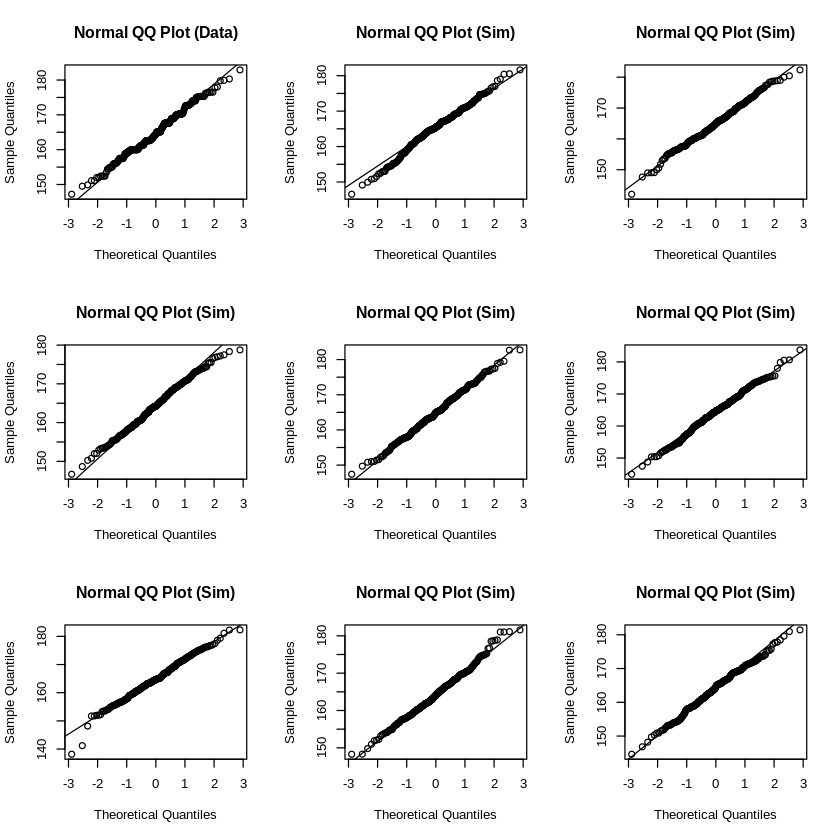

In [17]:
qqnormsim(female$hgt)

We can say the female heights are nearly normally distributed. 
Since we know that the data is normally distributed, 
we can answer all sorts of questions about that variable related to probability. 


For example: “What is the probability that a randomly chosen young adult female is taller than 6 feet (about 182 cm)?”

We can find this probability by calculating a Z score and consulting a Z table (also called a normal probability table). 
In R, this is done in one step with the function `pnorm`.

In [18]:
pnorm(q = 182, mean = female_hgt_mean, sd = female_hgt_sd)

[1] 0.9955656

Note that the function `pnorm` calculates the area under the normal curve below a given value, **q**, 
with a given mean and standard deviation. 
Since we’re interested in the probability that someone is taller than 182 cm, we have to take one minus that probability.

<img src="../images/normal.PNG"/>

If we want to calculate the probability empirically, 
we simply need to determine how many observations fall above 182 then divide this number by the total sample size.

In [19]:
sum(female$hgt > 182) / length(female$hgt)

[1] 0.003846154

Some of the content and images are referred from the following [webpage](http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm) discussing Statistical Distributions. 

### This concludes the continuous distribution review!